In [6]:
import numpy as np
import pandas as pd 
import numpy as np 
import seaborn as sns
import requests
import json 
import os 
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("google_review_ratings.csv")

In [56]:
df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [81]:
#Clean the dataset 
df = df.drop(columns=["Unnamed: 25"])

In [82]:
#Examine dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [83]:
df.shape

(5456, 25)

In [84]:
#put in the category names for all the locations
column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']
df.columns = column_names

In [85]:
#get rid of all the null rows 
df.isnull().sum()

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       1
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64

In [86]:
#fill null values with 0 
df = df.fillna(0)
df.isnull().sum()

user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       0
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  0
dtype: int64

In [87]:
#see the data types 
df.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [89]:
#convert local_services to float to match the other entries 
df['local_services'][df['local_services'] == '2\t2.']


2712    2\t2.
Name: local_services, dtype: object

In [91]:
local_services_mean = df['local_services'][df['local_services'] != '2\t2.']
df['local_services'][df['local_services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))
df['local_services'] = df['local_services'].astype('float64')

/var/folders/z4/1v04rv013v7dtkqzqc6yn5m80000gn/T/ipykernel_6362/3907036204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local_services'][df['local_services'] == '2\t2.'] = np.mean(local_services_mean.astype('float64'))


In [92]:
df.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [96]:
#Analyze Data
df[column_names[:]].describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0.5, 1.0, 'No of reviews under each category')

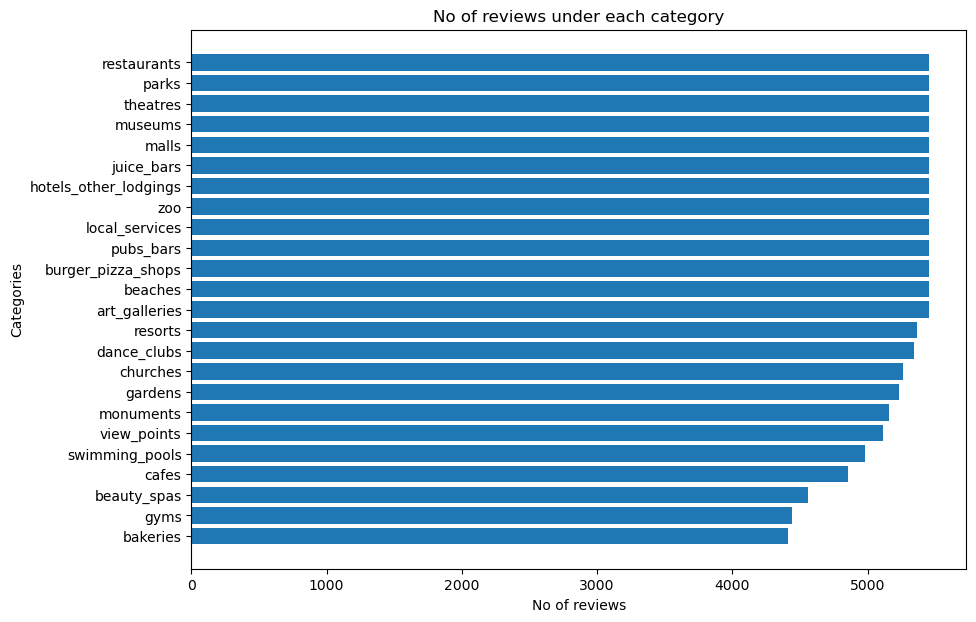

In [108]:
#Plot our data to better visualize
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])), no_of_zeros.values, align='center')
plt.yticks(np.arange(len(column_names[1:])), no_of_zeros.index)
plt.xlabel('No of reviews')
plt.ylabel('Categories')
plt.title('No of reviews under each category')

In [105]:
no_of_reviews = df[column_names[1:]].astype(bool).sum(axis=1).value_counts()

Text(0.5, 1.0, 'No of Categories vs No of reviews')

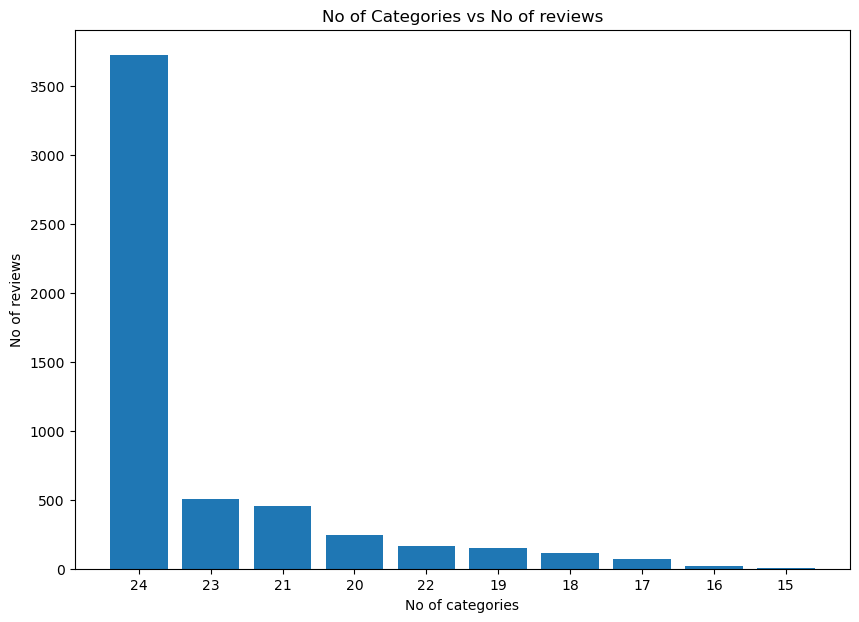

In [109]:
#Visualize summary of rating given by users to various categories
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)), no_of_reviews.values, align='center')
plt.xticks(np.arange(len(no_of_reviews)), no_of_reviews.index)
plt.ylabel('No of reviews')
plt.xlabel('No of categories')
plt.title('No of Categories vs No of reviews')

In [111]:
#Categorize our features so they are more spread out. We can use this to build a recommender system 

entertainment = ['theatres', 'dance_clubs', 'malls']
food_travel = ['restaurants', 'pubs_bars', 'burger_pizza_shops', 'juice_bars', 'bakeries', 'cafes']
places_of_stay = ['hotels_other_lodgings', 'resorts']
historical = ['churches', 'museums', 'art_galleries', 'monuments']
nature = ['beaches', 'parks', 'zoo', 'view_points', 'gardens']
services = ['local_services', 'swimming_pools', 'gyms', 'beauty_spas']

In [112]:
df_category_reviews = pd.DataFrame(columns = ['entertainment', 'food_travel', 'places_of_stay', 'historical', 'nature', 'services'])

In [114]:
df_category_reviews['entertainment'] = df[entertainment].mean(axis = 1)
df_category_reviews['food_travel'] = df[food_travel].mean(axis = 1)
df_category_reviews['places_of_stay'] = df[places_of_stay].mean(axis = 1)
df_category_reviews['historical'] = df[historical].mean(axis = 1)
df_category_reviews['nature'] = df[nature].mean(axis = 1)
df_category_reviews['services'] = df[services].mean(axis = 1)

In [115]:
df_category_reviews.describe()

,entertainment,food_travel,places_of_stay,historical,nature,services
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2.501045,2.027203,2.222609,2.021809,2.227604,1.330440
std,0.722411,0.549360,0.886588,0.584988,0.662531,0.580788
min,1.120000,0.721667,0.730000,0.557500,0.576000,0.205000
25%,1.963333,1.650000,1.470000,1.647500,1.762000,0.937500
50%,2.453333,2.027500,1.885000,1.977500,2.160000,1.245000
75%,2.916667,2.433750,3.160000,2.392500,2.656000,1.685000
max,5.000000,3.873333,5.000000,4.322500,4.520000,3.937500


In [139]:
#Recommender Engine based on k nearest neighbors
from sklearn.neighbors import NearestNeighbors

input_data_matrix = df[column_names[1:]].values
knn_model = NearestNeighbors(n_neighbors=5).fit(input_data_matrix)

query_index = np.random.choice(df[column_names[1:]].shape[0])
distances, indices = knn_model.kneighbors(df[column_names[1:]].iloc[query_index, :].values.reshape(1,-1), n_neighbors = 5)

def compare_df(index, ind):        
    zero_cols_in = df.loc[index].astype(bool)
    zero_df_in = pd.DataFrame(zero_cols_in[zero_cols_in == True]).reset_index(level = 0)
    in_wo_rating = zero_df_in['index']
    sug_user = df.loc[ind]
    zero_cols_sug = sug_user.astype(bool)
    zero_df_sug = pd.DataFrame(zero_cols_sug[zero_cols_sug == True]).reset_index(level = 0)
    sug_wo_rating = zero_df_sug['index']
    sugg_list = list(set(sug_wo_rating) - set(in_wo_rating))
    return sugg_list
def recommend_knn(index):
    distances, indices = knn_model.kneighbors(df[column_names[1:]].iloc[index, :].values.reshape(1,-1), n_neighbors = 10)
    distances = np.sort(distances)
    for i in range(0,len(indices[0])):
        ind = np.where(distances.flatten() == distances[0][i])[0][0]
        sug_list = compare_df(index, indices[0][i]) 
        if len(sug_list) > 0:
            break
    return sug_list

In [140]:
#Test our function on some values: 
print(recommend_knn(100))
print(recommend_knn(50))
print(recommend_knn(16))
print(recommend_knn(4))
print(recommend_knn(3))

[]
['gyms']
['swimming_pools']
['resorts']
['beauty_spas']
